# Computer Vision - P2

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 11th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

(1024, 768, 3) uint8


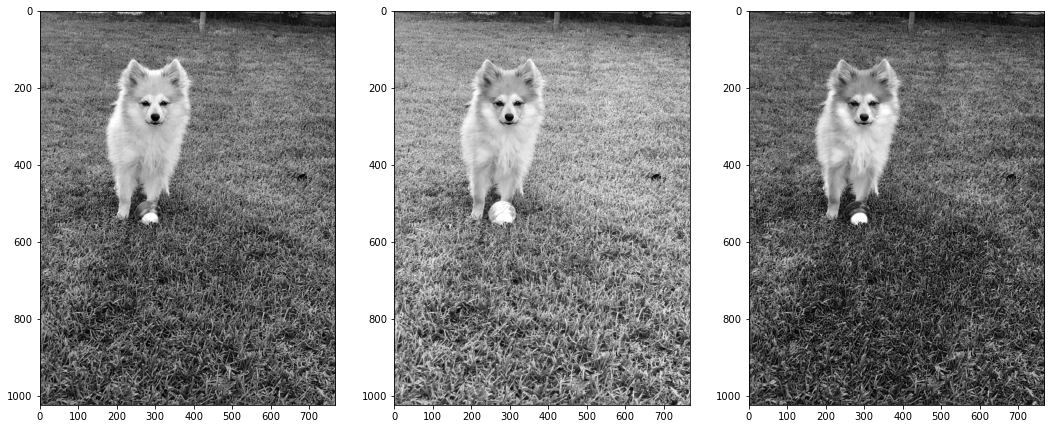

In [66]:
#your solution
from skimage import io
import matplotlib.pyplot as plt
#Read the image 
rocki=io.imread('images_notebook/rocki.jpeg')

print(rocki.shape, rocki.dtype)

fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,3,1)
plt.imshow(rocki[:,:,0],cmap='gray')

fig.add_subplot(1,3,2)
plt.imshow(rocki[:,:,1],cmap='gray')

fig.add_subplot(1,3,3)
plt.imshow(rocki[:,:,2],cmap='gray')


b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

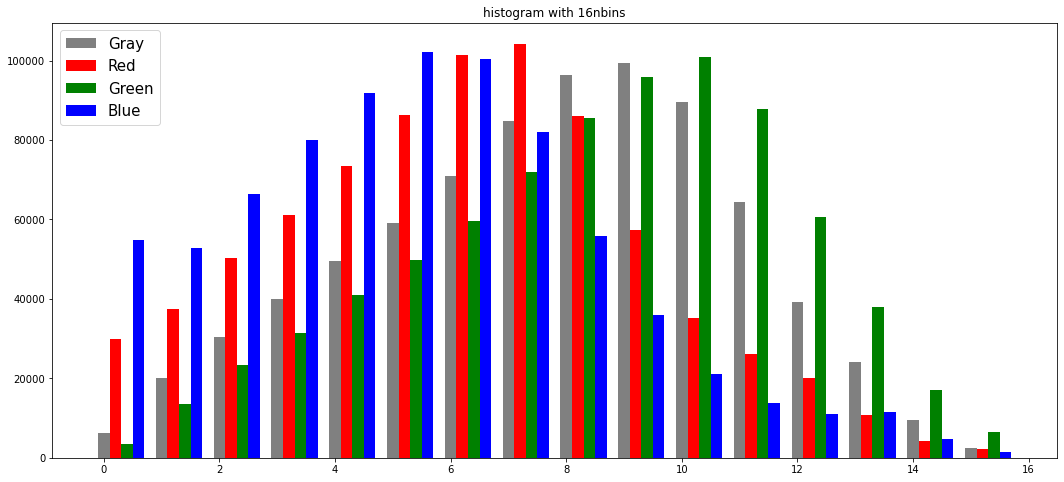

In [67]:
#your solution
import numpy as np
from skimage.exposure import histogram
from skimage import img_as_float
from skimage.color import rgb2gray

rocki_gray = rgb2gray(rocki)
rocki_gray = 255*rocki_gray



numberOfBins = 16
hst_gray16, bins_gray = histogram( rocki_gray, nbins=numberOfBins)
hst_r16, bins_r = histogram( (img_as_float(rocki[:,:,0])*255), nbins=numberOfBins)
hst_g16, bins_g = histogram( (img_as_float(rocki[:,:,1])*255), nbins=numberOfBins)
hst_b16, bins_b = histogram( (img_as_float(rocki[:,:,2])*255), nbins=numberOfBins)
ind16 = np.arange( numberOfBins)

numberOfBins = 32
hst_gray32, bins_gray = histogram( rocki_gray, nbins=numberOfBins)
hst_r32, bins_r = histogram( (img_as_float(rocki[:,:,0])*255), nbins=numberOfBins)
hst_g32, bins_g = histogram( (img_as_float(rocki[:,:,1])*255), nbins=numberOfBins)
hst_b32, bins_b = histogram( (img_as_float(rocki[:,:,2])*255), nbins=numberOfBins)
ind32 = np.arange( numberOfBins)



fig = plt.figure(figsize=(18,8))
cl_gray = plt.bar( ind16, hst_gray16, 0.2, color='gray')
cl_r = plt.bar( ind16+.2, hst_r16, 0.2, color='r')
cl_g = plt.bar( ind16+.4, hst_g16,0.2, color='g')
cl_b = plt.bar( ind16+.6, hst_b16,0.2, color='b')
plt.legend((cl_gray[0], cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc=2, prop={'size': 15})
plt.title('histogram with 16nbins')
plt.show()



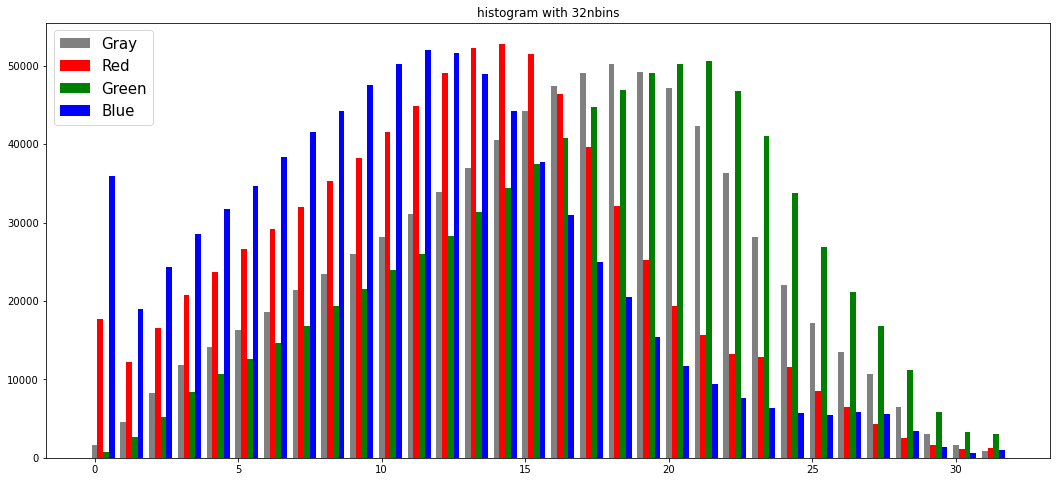

In [68]:
numberOfBins = 32
hst_gray, bins_gray = histogram( rocki_gray, nbins=numberOfBins)
hst_r, bins_r = histogram( (img_as_float(rocki[:,:,0])*255), nbins=numberOfBins)
hst_g, bins_g = histogram( (img_as_float(rocki[:,:,1])*255), nbins=numberOfBins)
hst_b, bins_b = histogram( (img_as_float(rocki[:,:,2])*255), nbins=numberOfBins)
ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
cl_gray = plt.bar( ind, hst_gray, 0.2, color='gray')
cl_r = plt.bar( ind+.2, hst_r, 0.2, color='r')
cl_g = plt.bar( ind+.4, hst_g,0.2, color='g')
cl_b = plt.bar( ind+.6, hst_b,0.2, color='b')
plt.legend((cl_gray[0], cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc=2, prop={'size': 15})
plt.title('histogram with 32nbins')
plt.show()

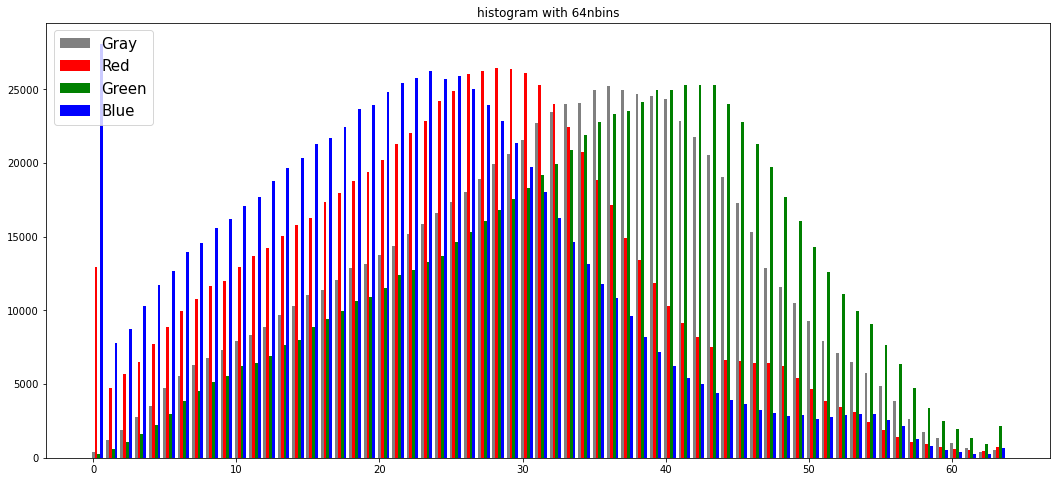

In [69]:
numberOfBins = 64
hst_gray, bins_gray = histogram( rocki_gray, nbins=numberOfBins)
hst_r, bins_r = histogram( (img_as_float(rocki[:,:,0])*255), nbins=numberOfBins)
hst_g, bins_g = histogram( (img_as_float(rocki[:,:,1])*255), nbins=numberOfBins)
hst_b, bins_b = histogram( (img_as_float(rocki[:,:,2])*255), nbins=numberOfBins)
ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
cl_gray = plt.bar( ind, hst_gray, 0.2, color='gray')
cl_r = plt.bar( ind+.2, hst_r, 0.2, color='r')
cl_g = plt.bar( ind+.4, hst_g,0.2, color='g')
cl_b = plt.bar( ind+.6, hst_b,0.2, color='b')
plt.legend((cl_gray[0], cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc=2, prop={'size': 15})
plt.title('histogram with 64nbins')
plt.show()

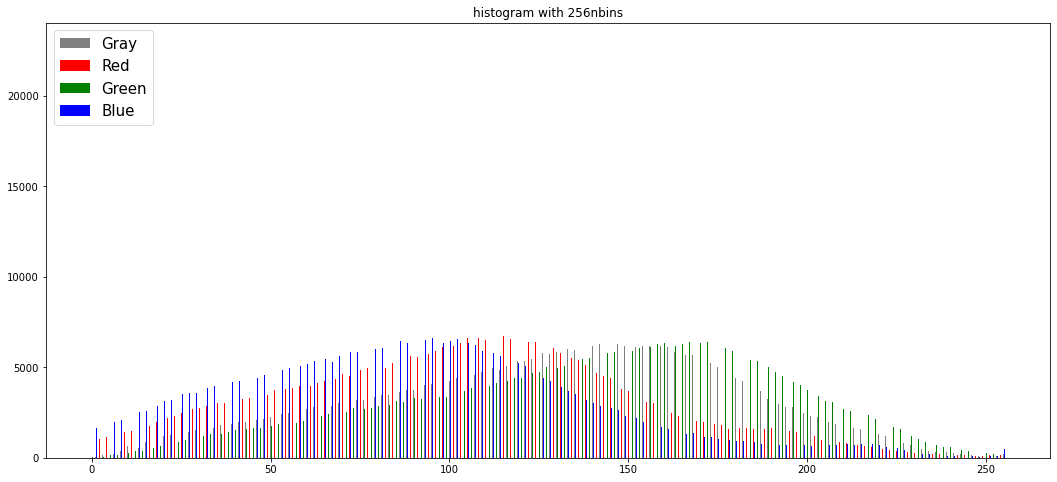

In [70]:
numberOfBins = 256
hst_gray, bins_gray = histogram( rocki_gray, nbins=numberOfBins)
hst_r, bins_r = histogram( (img_as_float(rocki[:,:,0])*255), nbins=numberOfBins)
hst_g, bins_g = histogram( (img_as_float(rocki[:,:,1])*255), nbins=numberOfBins)
hst_b, bins_b = histogram( (img_as_float(rocki[:,:,2])*255), nbins=numberOfBins)
ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
cl_gray = plt.bar( ind, hst_gray, 0.1, color='gray')
cl_r = plt.bar( ind+.1, hst_r, 0.1, color='r')
cl_g = plt.bar( ind+.2, hst_g,0.1, color='g')
cl_b = plt.bar( ind+.3, hst_b,0.1, color='b')
plt.legend((cl_gray[0], cl_r[0], cl_g[0], cl_b[0]), ('Gray','Red','Green','Blue'), loc=2, prop={'size': 15})
plt.title('histogram with 256nbins')
plt.show()

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


rocki_gray 0.02021098039215829 0.9945456862745099 float64
rocki_hd1 0.04965379084967369 0.952742562091503 float64
rocki_t 0.04417890196078402 0.9212928758169934 float64
rocki_2d 0.06859388845315927 0.8471427407407408 float64


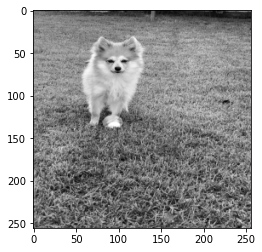

In [71]:
#your solution
from skimage.transform import resize
from skimage.color import rgb2gray
from scipy.ndimage import convolve



rocki=io.imread('images_notebook/rocki.jpeg')
rocki=resize(rocki,(256,256))
rocki_gray = rgb2gray(rocki)
mask_h1d=np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
mask_h1d=mask_h1d/np.sum(mask_h1d) 
mask_t = np.transpose(mask_h1d)
mask_2d = np.ones((15,15))
mask_2d=mask_2d/np.sum(mask_2d) 

rocki_hd1 = convolve(rocki_gray, mask_h1d, mode='constant', cval=0.0)
rocki_t = convolve(rocki_gray, mask_t, mode='constant', cval=0.0)
rocki_2d = convolve(rocki_gray, mask_2d, mode='constant', cval=0.0)



print("rocki_gray",rocki_gray.min(),rocki_gray.max(),rocki_gray.dtype)
print("rocki_hd1",rocki_hd1.min(),rocki_hd1.max(),rocki_hd1.dtype)
print("rocki_t",rocki_t.min(),rocki_t.max(),rocki_t.dtype)
print("rocki_2d",rocki_2d.min(),rocki_2d.max(),rocki_2d.dtype)
plt.imshow(rocki_gray,cmap='gray')



b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


Text(0.5, 1.0, 'Uniformly convolved')

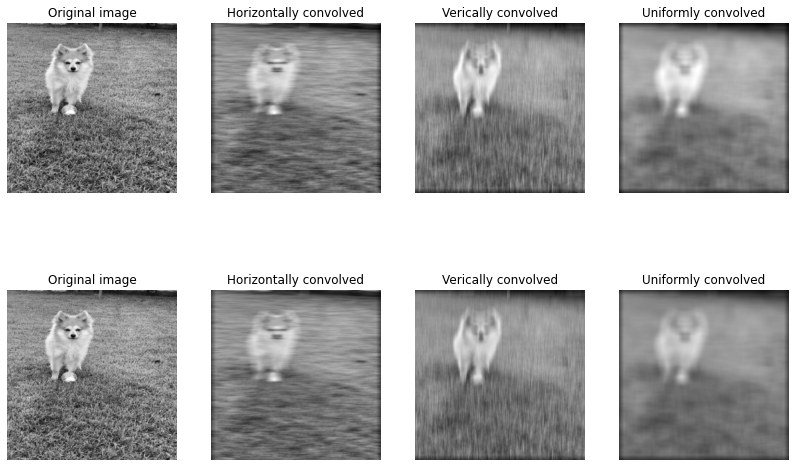

In [72]:
#your solution
fig, axs = plt.subplots(nrows=2, ncols=4,figsize=(14,9))

ax = axs[0,0]
ax.imshow(rocki_gray, cmap='gray')
ax.axis('off')
ax.set_title('Original image')

ax = axs[0,1]
ax.imshow(rocki_hd1, cmap='gray')
ax.axis('off')
ax.set_title('Horizontally convolved')

ax = axs[0,2]
ax.imshow(rocki_t, cmap='gray')
ax.axis('off')
ax.set_title('Verically convolved')

ax = axs[0,3]
ax.imshow(rocki_2d, cmap='gray')
ax.axis('off')
ax.set_title('Uniformly convolved')

#WITHOUT PIXEL VALUE RANGE RESCALING 

ax = axs[1,0]
ax.imshow(rocki_gray, cmap='gray', vmin=0, vmax=1)
ax.axis('off')
ax.set_title('Original image')

ax = axs[1,1]
ax.imshow(rocki_hd1, cmap='gray', vmin=0, vmax=1)
ax.axis('off')
ax.set_title('Horizontally convolved')

ax = axs[1,2]
ax.imshow(rocki_t, cmap='gray', vmin=0, vmax=1)
ax.axis('off')
ax.set_title('Verically convolved')

ax = axs[1,3]
ax.imshow(rocki_2d, cmap='gray', vmin=0, vmax=1)
ax.axis('off')
ax.set_title('Uniformly convolved')


c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


(256, 256, 3)


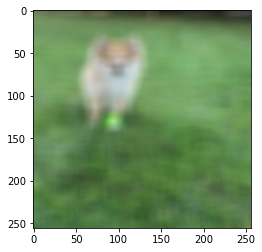

In [73]:
#your solution
# In order to convolve a RBG image we found a python function that applies the mask to each channel separately which 
# is callen apapt_rgb 
from skimage.color.adapt_rgb import adapt_rgb, each_channel

@adapt_rgb(each_channel)
def convolve_3_channels(image, mask):
    return convolve(image, mask)

print(rocki.shape)
mask_15 = np.ones((15,15))
mask_15=mask_15/np.sum(mask_15)
rocki=convolve_3_channels(rocki, mask_15)
plt.imshow(rocki,cmap='gray')





### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


(2560, 2560) 0.9945456862745099
(26, 26)


<BarContainer object of 32 artists>

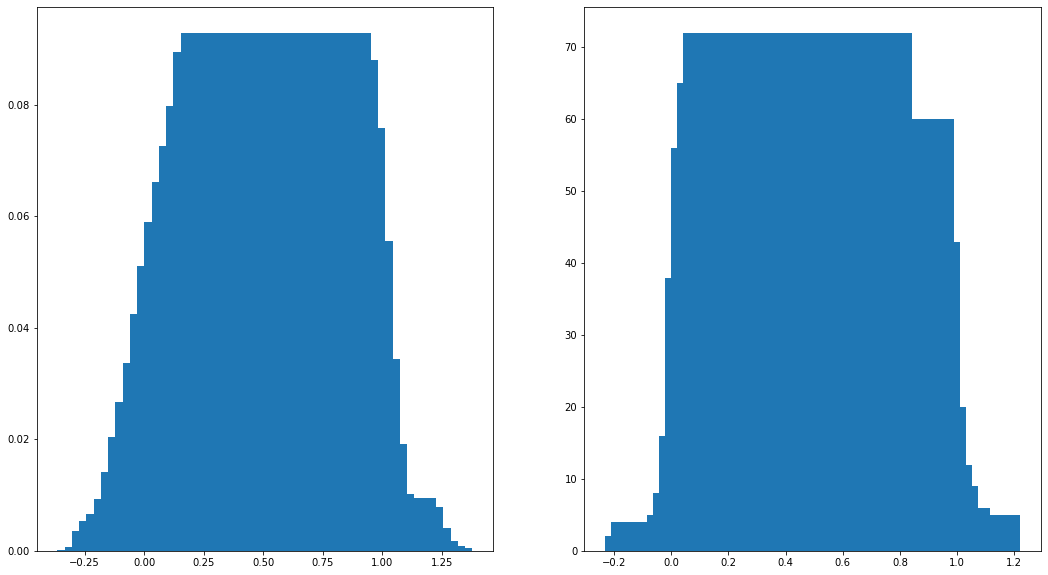

In [74]:
#your solution
# when applying the reduce to the image the histogram loses definition due to the reduced image has less pixels than 
# the original or augmented image
from skimage.exposure import histogram
from skimage import img_as_float
from skimage.transform import rescale
from matplotlib import pyplot as plt

rocki_gray10=rescale(rocki_gray,10)
rocki_gray01=rescale(rocki_gray,0.1)


print(rocki_gray10.shape, rocki_gray.max())
print(rocki_gray01.shape)

hst10 = histogram(rocki_gray10, nbins=32, source_range='image', normalize=True)
hst01 = histogram(rocki_gray01, nbins=32, source_range='image', normalize=False)


fig=plt.figure(figsize=(18,10))


fig.add_subplot(1,2,1)
plt.bar(hst10[1],hst10[0])

fig.add_subplot(1,2,2)
plt.bar(hst01[1],hst01[0])




b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

(array([  18,   90,  306,  437,  630,  867, 1235, 1579, 1855, 2339, 2641,
       3079, 3485, 3936, 4342, 4911, 5481, 5615, 5504, 4890, 3871, 2748,
       1714, 1018,  696,  577,  609,  533,  304,  120,   63,   43],
      dtype=int64), array([0.03543496, 0.06588292, 0.09633088, 0.12677884, 0.1572268 ,
       0.18767476, 0.21812272, 0.24857068, 0.27901864, 0.3094666 ,
       0.33991456, 0.37036252, 0.40081047, 0.43125843, 0.46170639,
       0.49215435, 0.52260231, 0.55305027, 0.58349823, 0.61394619,
       0.64439415, 0.67484211, 0.70529007, 0.73573803, 0.76618599,
       0.79663395, 0.82708191, 0.85752987, 0.88797783, 0.91842579,
       0.94887375, 0.97932171]))


<BarContainer object of 32 artists>

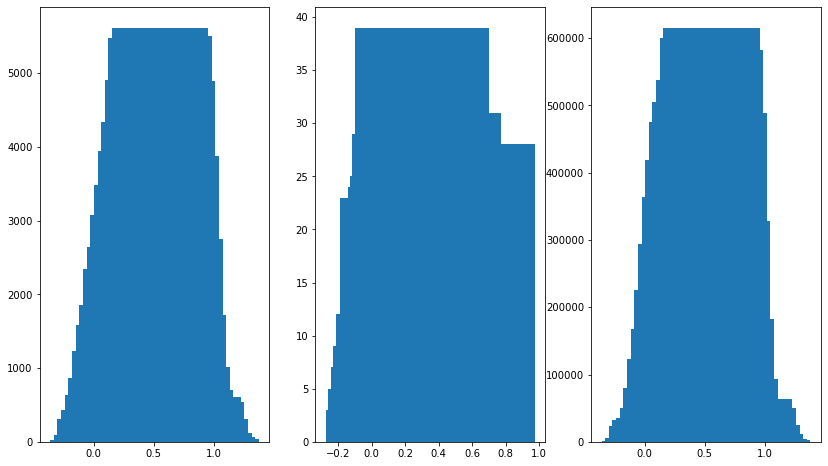

In [75]:
#your solution
#original and augmented are very similar, reduced loses definitions because de fusion of pixels when image is reduced.
rocki_original = convolve(rocki_gray, mask_15, mode='constant', cval=0.0) #original
rocki_gray01 = convolve(rocki_gray01, mask_15, mode='constant', cval=0.0) #reduced
rocki_gray10 = convolve(rocki_gray10, mask_15, mode='constant', cval=0.0) #augmented


hstog = histogram(rocki_gray, nbins=32, source_range='image', normalize=False)   #original
hst01 = histogram(rocki_gray01, nbins=32, source_range='image', normalize=False) #reduced
hst10 = histogram(rocki_gray10, nbins=32, source_range='image', normalize=False) #augmented



fig=plt.figure(figsize=(14,8))
print(hstog)
fig.add_subplot(1,3,1)
plt.bar(hstog[1],hstog[0])

fig.add_subplot(1,3,2)
plt.bar(hst01[1],hst01[0])


fig.add_subplot(1,3,3)
plt.bar(hst10[1],hst10[0])


### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

Text(0.5, 1.0, 'Median')

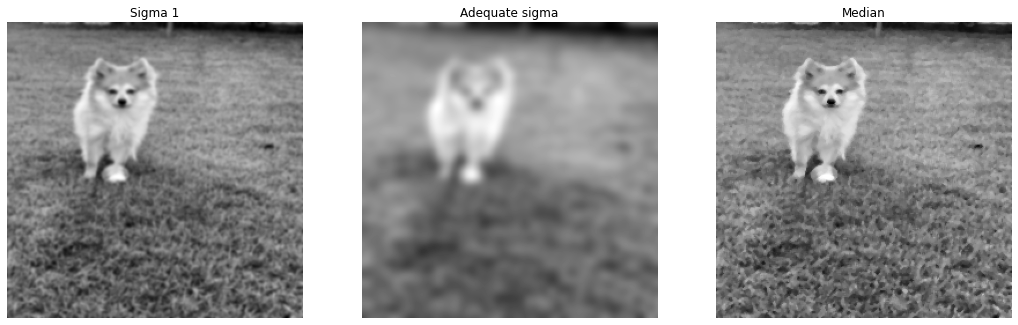

In [76]:
#your solution
from skimage import filters
'''
Gaussian filter reduces noise and blurs the image, the greater sigma we apply blurs more the image.
An adequate sigma depends on the resolution of the image and the objects in it. In this case we think thath a 
Sigma greater than 4 it would nt work for keeping the main object of the image.
'''
rocki_gray_SIGMA1 = filters.gaussian(rocki_gray, 1)
rocki_gray_SIGMA = filters.gaussian(rocki_gray, 4)
rocki_gray_median = filters.median(rocki_gray)

fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(18,10))

ax = axs[0]
ax.imshow(rocki_gray_SIGMA1, cmap='gray')
ax.axis('off')
ax.set_title('Sigma 1')

ax = axs[1]
ax.imshow(rocki_gray_SIGMA, cmap='gray')
ax.axis('off')
ax.set_title('Adequate sigma')

ax = axs[2]
ax.imshow(rocki_gray_median, cmap='gray')
ax.axis('off')
ax.set_title('Median')





b) **(Optional)** Apply the smoothing on some other images and present their results.

In [77]:
#your solution

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

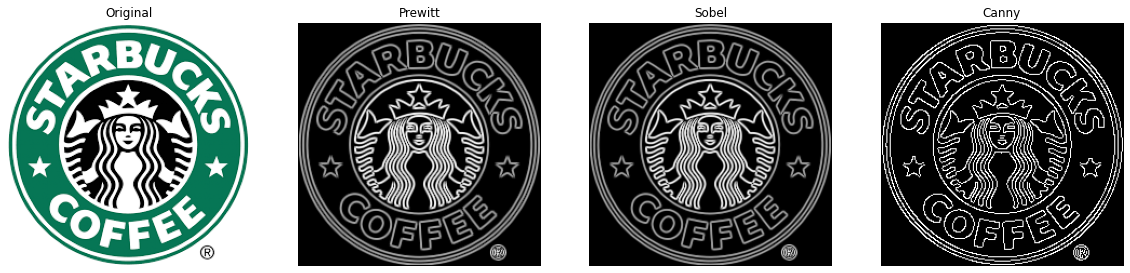

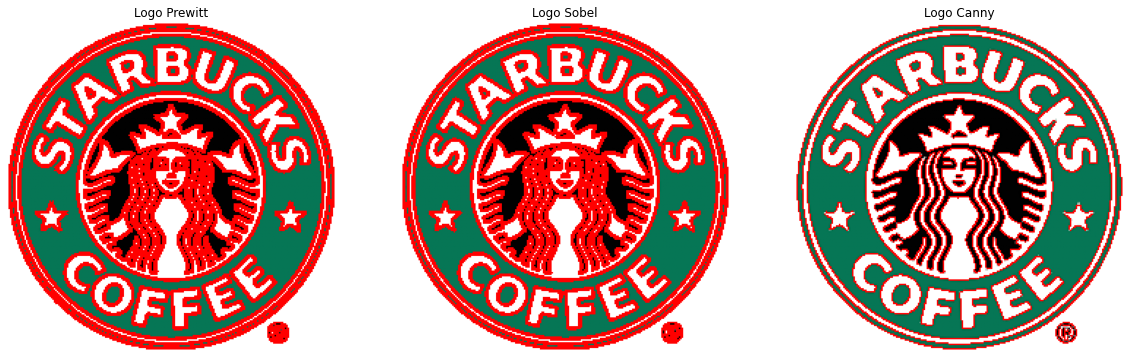

"\n*** QUESTIONS ***\n1. Which is the best countour detection technique?\n> After applying all the asked filters in order to obtain the countours of the logo image, \nWe concluded that the Prewitt and the Sobel methods are the best because they select the countours \nof the image with a extra width, giving some roundy smooth effect to the borders.\n\n2. Which are the optimal parameters for this image?\n> Since we used only the standard parameters for the functions used in order to get the countours, \nexcept the Canny method, We can say that the one type of optimal parameters are the default ones. \nFor the Canny, we used 1 as the value for the Sigma parameter.\n\n3. Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?\n> One of the parameters that we can use is a mask that's going to be applied to the picture. \nSince we use the default one, we can asume that the default mask was previously normalized\n"

In [78]:
from scipy import ndimage
from skimage import filters
from skimage.color import rgb2gray
from skimage.color import rgba2rgb
from skimage import data, feature, exposure

def show_contours(imagergb,canny_sigma=0.03):
    gray_image = rgb2gray(imagergb)
    image_roberts = filters.roberts(gray_image)
    image_prewitt = filters.prewitt(gray_image)
    image_sobel = filters.sobel(gray_image)
    image_canny=feature.canny(gray_image, canny_sigma)

    fig, axs = plt.subplots(ncols=4, nrows=1,figsize=(20,8)) # We create the 4 subplots and we show them
    ax = axs[0]
    ax.imshow(imagergb)
    ax.axis('off')
    ax.set_title('Original') # We set the title
    ax = axs[1]
    ax.imshow(image_prewitt,cmap='gray')
    ax.axis('off')
    ax.set_title('Prewitt') # We set the title
    ax = axs[2]
    ax.imshow(image_sobel,cmap='gray')
    ax.axis('off')
    ax.set_title('Sobel') # We set the title
    ax = axs[3]
    ax.imshow(image_canny,cmap='gray')
    ax.axis('off')
    ax.set_title('Canny') # We set the title
    plt.show()
    
    return image_prewitt,image_sobel,image_canny

# Superimpose the contours over the image.
def superpose_contours(base, contour,redvalue):
    base = base.copy()
    threshold = 0.1
    base[:,:,0][contour > threshold] = redvalue
    base[:,:,1][contour > threshold] = 0
    base[:,:,2][contour > threshold] = 0
    return base

logo = rgba2rgb(io.imread('images_notebook/logo.png'))
logo_prewitt,logo_sobel,logo_canny = show_contours(logo)

fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(20,8)) # We create the 3 subplots and we show them
ax = axs[0]
ax.imshow(superpose_contours(logo, logo_prewitt,1))
ax.axis('off')
ax.set_title('Logo Prewitt') # We set the title
ax = axs[1]
ax.imshow(superpose_contours(logo, logo_sobel,1))
ax.axis('off')
ax.set_title('Logo Sobel') # We set the title
ax = axs[2]
ax.imshow(superpose_contours(logo, logo_canny,1))
ax.axis('off')
ax.set_title('Logo Canny') # We set the title
plt.show()

'''
*** QUESTIONS ***
1. Which is the best countour detection technique?
> After applying all the asked filters in order to obtain the countours of the logo image, 
We concluded that the Prewitt and the Sobel methods are the best because they select the countours 
of the image with a extra width, giving some roundy smooth effect to the borders.

2. Which are the optimal parameters for this image?
> Since we used only the standard parameters for the functions used in order to get the countours, 
except the Canny method, We can say that the one type of optimal parameters are the default ones. 
For the Canny, we used 1 as the value for the Sigma parameter.

3. Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?
> One of the parameters that we can use is a mask that's going to be applied to the picture. 
Since we use the default one, we can asume that the default mask was previously normalized
'''

b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

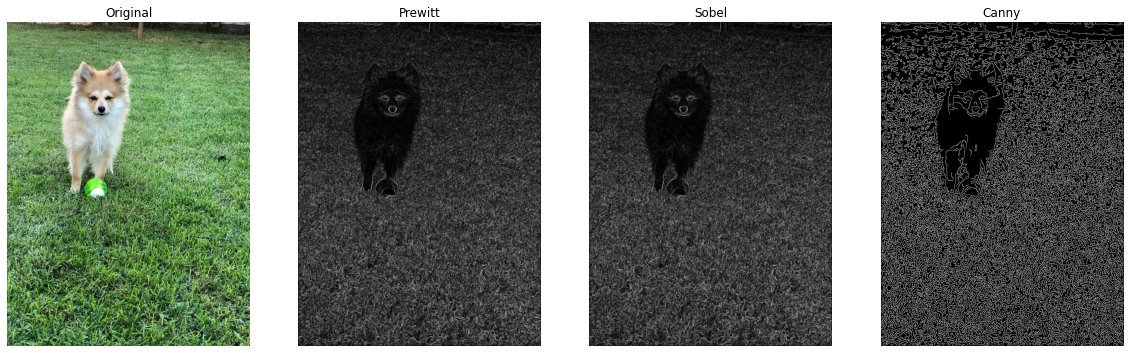

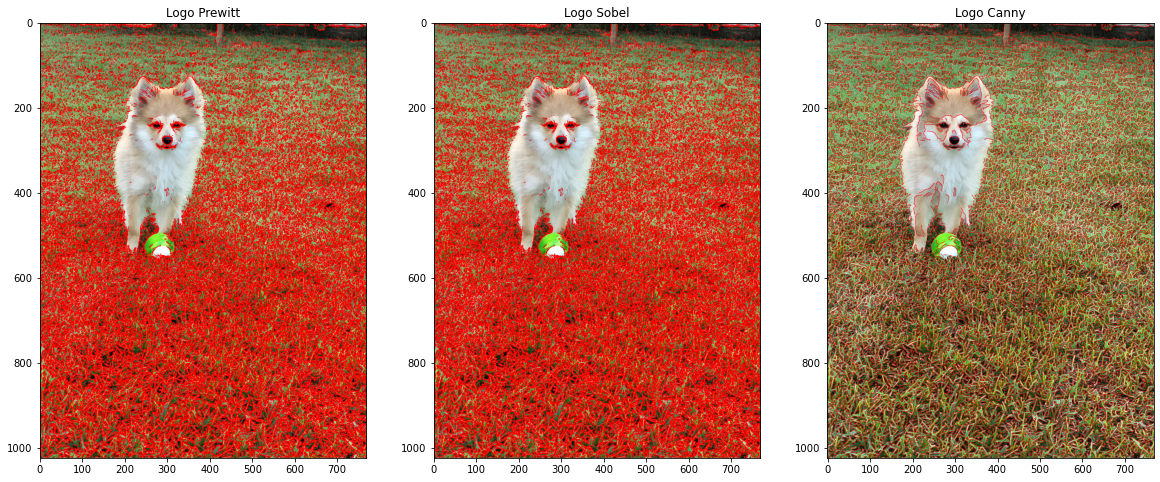

'\n- Are the contours improved if the image is previously smoothed ?\nIf the image is previously smoothed the contours are better. \nBy smoothing the image, this process does a median filter and by this, the contours can be seen improved.\n\n- Which are the limitations of the different images contour extraction?\nDepending of the contour extraction method used, it can be apprecieated that in the Prewitt and Sobel,\nthe contours are more defined than in the Roberts or the Canny. In the Canny, precisely, the contours are defined \nby the value of the second derivate of the image.\n'

In [79]:
#your solution
image = io.imread('images_notebook/rocki.jpeg')
image_prewitt,image_sobel,image_canny = show_contours(image,canny_sigma=1.7)

fig, axs = plt.subplots(ncols=3, nrows=1,figsize=(20,8)) # We create the 4 subplots and we show them
ax = axs[0]
ax.imshow(superpose_contours(image, image_prewitt,255))
ax.set_title('Logo Prewitt') # We set the title
ax = axs[1]
ax.imshow(superpose_contours(image, image_sobel,255))
ax.set_title('Logo Sobel') # We set the title
ax = axs[2]
ax.imshow(superpose_contours(image, image_canny,255))
ax.set_title('Logo Canny') # We set the title
plt.show()

'''
- Are the contours improved if the image is previously smoothed ?
If the image is previously smoothed the contours are better. 
By smoothing the image, this process does a median filter and by this, the contours can be seen improved.

- Which are the limitations of the different images contour extraction?
Depending of the contour extraction method used, it can be apprecieated that in the Prewitt and Sobel,
the contours are more defined than in the Roberts or the Canny. In the Canny, precisely, the contours are defined 
by the value of the second derivate of the image.
'''

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


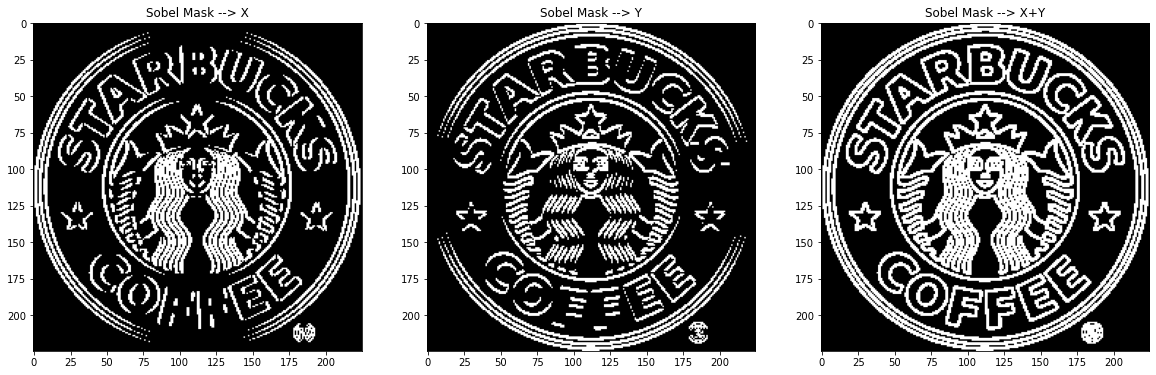

'\nIn the first image we can see the horizontal contours, in the second one the vertical, and in the last one,\nthe sum of both.\n'

In [80]:
'''
We can apply it with three different methods:
1. Applying the Sobel filter with the skimage library. ---> DONE
2. Applying the Sobel mask for horizontal gradient contour checking.
3. Applying the Sobel mask for vertical gradient contour checking.
'''

maskX = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
sobelX = convolve_3_channels(rgb2gray(logo.copy()), maskX)
sobelY = convolve_3_channels(rgb2gray(logo.copy()), maskX.T)
f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(20,8)) # We create the 5 subplots and we show them
axarr[0].imshow(abs(sobelX)>0.9, cmap='gray') #we show only the contours
axarr[0].set_title('Sobel Mask --> X') # We set the title
axarr[1].imshow(abs(sobelY)>0.9, cmap='gray')
axarr[1].set_title('Sobel Mask --> Y') # We set the title
axarr[2].imshow(abs(sobelX) + abs(sobelY)>0.9, cmap='gray')
axarr[2].set_title('Sobel Mask --> X+Y') # We set the title
plt.show()

'''
In the first image we can see the horizontal contours, in the second one the vertical, and in the last one,
the sum of both.
'''

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

uint8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


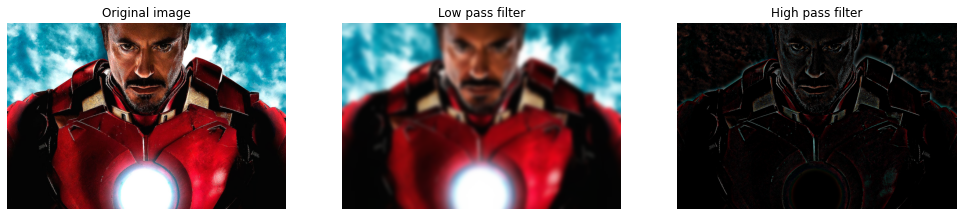

In [81]:
#your solution
from skimage import filters
ironman = io.imread('./images_notebook/Ironman.jpg') #it's 2 dim
print(ironman.dtype)
LP_SIGMA = 10
ironman_lp = filters.gaussian(img_as_float(ironman), LP_SIGMA) *255
ironman_hp = filters.gaussian(img_as_float(ironman), LP_SIGMA ) 
ironman_hp = img_as_float(ironman) - ironman_hp 

f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(17,8)) # We create the 5 subplots and we show them
axarr[0].imshow(ironman,cmap='gray')
axarr[0].set_title('Original image') # We set the title
axarr[0].axis('off')
axarr[1].imshow(ironman_lp.astype('uint8'),cmap='gray')
axarr[1].set_title('Low pass filter') # We set the title
axarr[1].axis('off')
axarr[2].imshow(ironman_hp,cmap='gray')
axarr[2].set_title('High pass filter') # We set the title
axarr[2].axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


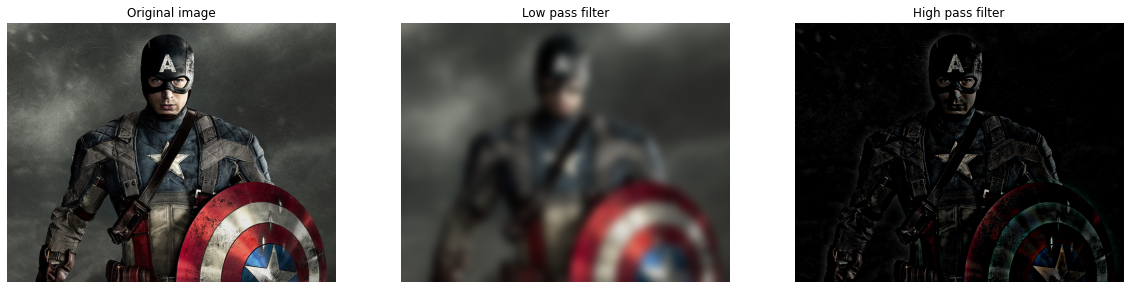

In [82]:
captain = io.imread('./images_notebook/Capitain_America.jpg') #it's 2 dim

# We assign the sigma of the low profile filter with 10 proving that it is indeed a good value
LP_SIGMA = 10

# We pass the pixels of the image to float
captain = img_as_float(captain)
# We create the image with the low pass filter using a Gaussian filter with sigma 10
captain_low = filters.gaussian(captain, LP_SIGMA)
# We obtain the high profile filter by subtracting the image with the low profile filter from the original image
captain_high = captain-captain_low

f, axarr = plt.subplots(ncols=3, nrows=1,figsize=(20,8)) # We create the 3 subplots and we show them
axarr[0].imshow(captain,cmap='gray')
axarr[0].set_title('Original image') # We set the title
axarr[0].axis('off')
axarr[1].imshow(captain_low,cmap='gray')
axarr[1].set_title('Low pass filter') # We set the title
axarr[1].axis('off')
axarr[2].imshow(captain_high,cmap='gray')
axarr[2].set_title('High pass filter') # We set the title
axarr[2].axis('off')
plt.show()

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

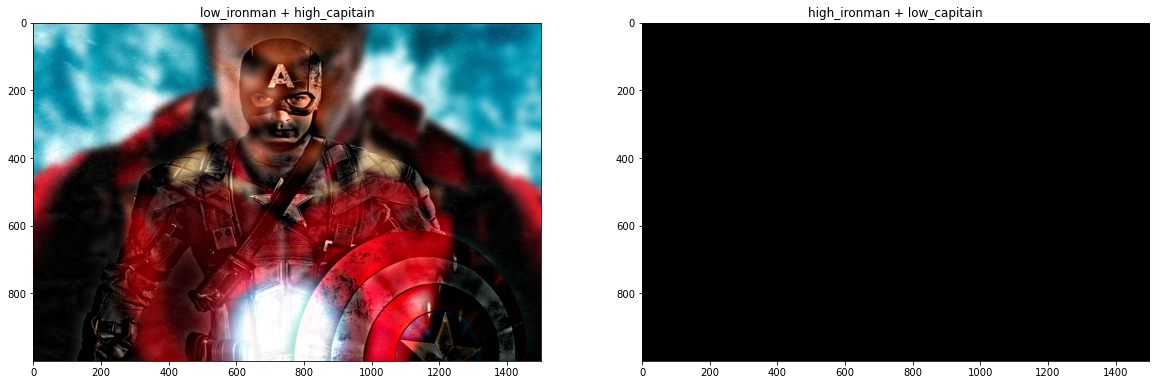

In [85]:
# We resize the captain's images because they need to have the same size as the ironman's images
# We assign the sigma of the low profile filter with 10 proving that it is indeed a good value
LP_SIGMA = 10

captain_low = resize(captain_low, (1000,1500,3))
captain_high = resize(captain_high, (1000,1500,3))
result1 = ironman_low + captain_high;
result2 = ironman_high + captain_low;

f, axarr = plt.subplots(ncols=2, nrows=1,figsize=(20,8)) # We create the 2 subplots and we show them
axarr[0].imshow(result1,cmap='gray')
axarr[0].set_title('low_ironman + high_capitain') # We set the title
axarr[1].imshow(result2,cmap='gray')
axarr[1].set_title('high_ironman + low_capitain') # We set the title
plt.show


### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>


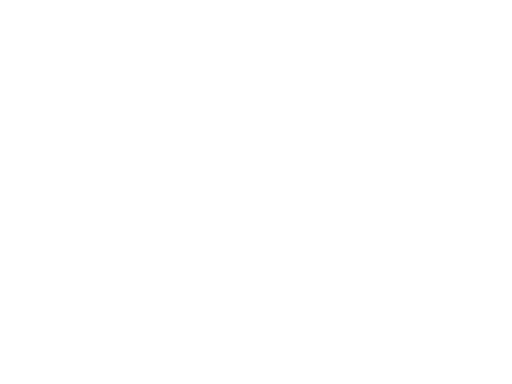

In [86]:

""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


Traceback (most recent call last):
  File "C:\Users\Victor\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "C:\Users\Victor\anaconda3\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


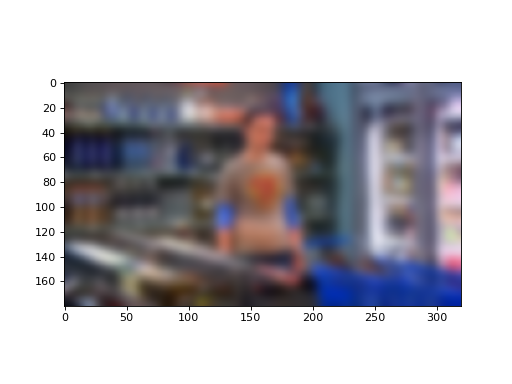

In [87]:
import warnings
warnings.filterwarnings("ignore")
from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int((ic[0].shape[0])*scale)
width=np.int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))


%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    im.set_array(filters.gaussian(ic_small[:,:,:,i],4)) # we have used a gaussian filter in order to make faces unrecognizible
    plt.draw()                                          #but we could had use other filters such and horizontal/vertical mask,
    return im,                                          #2D array...

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()

